In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy.integrate import quad # type: ignore
%matplotlib inline

from svi import *

# Example for SVI Parameterization

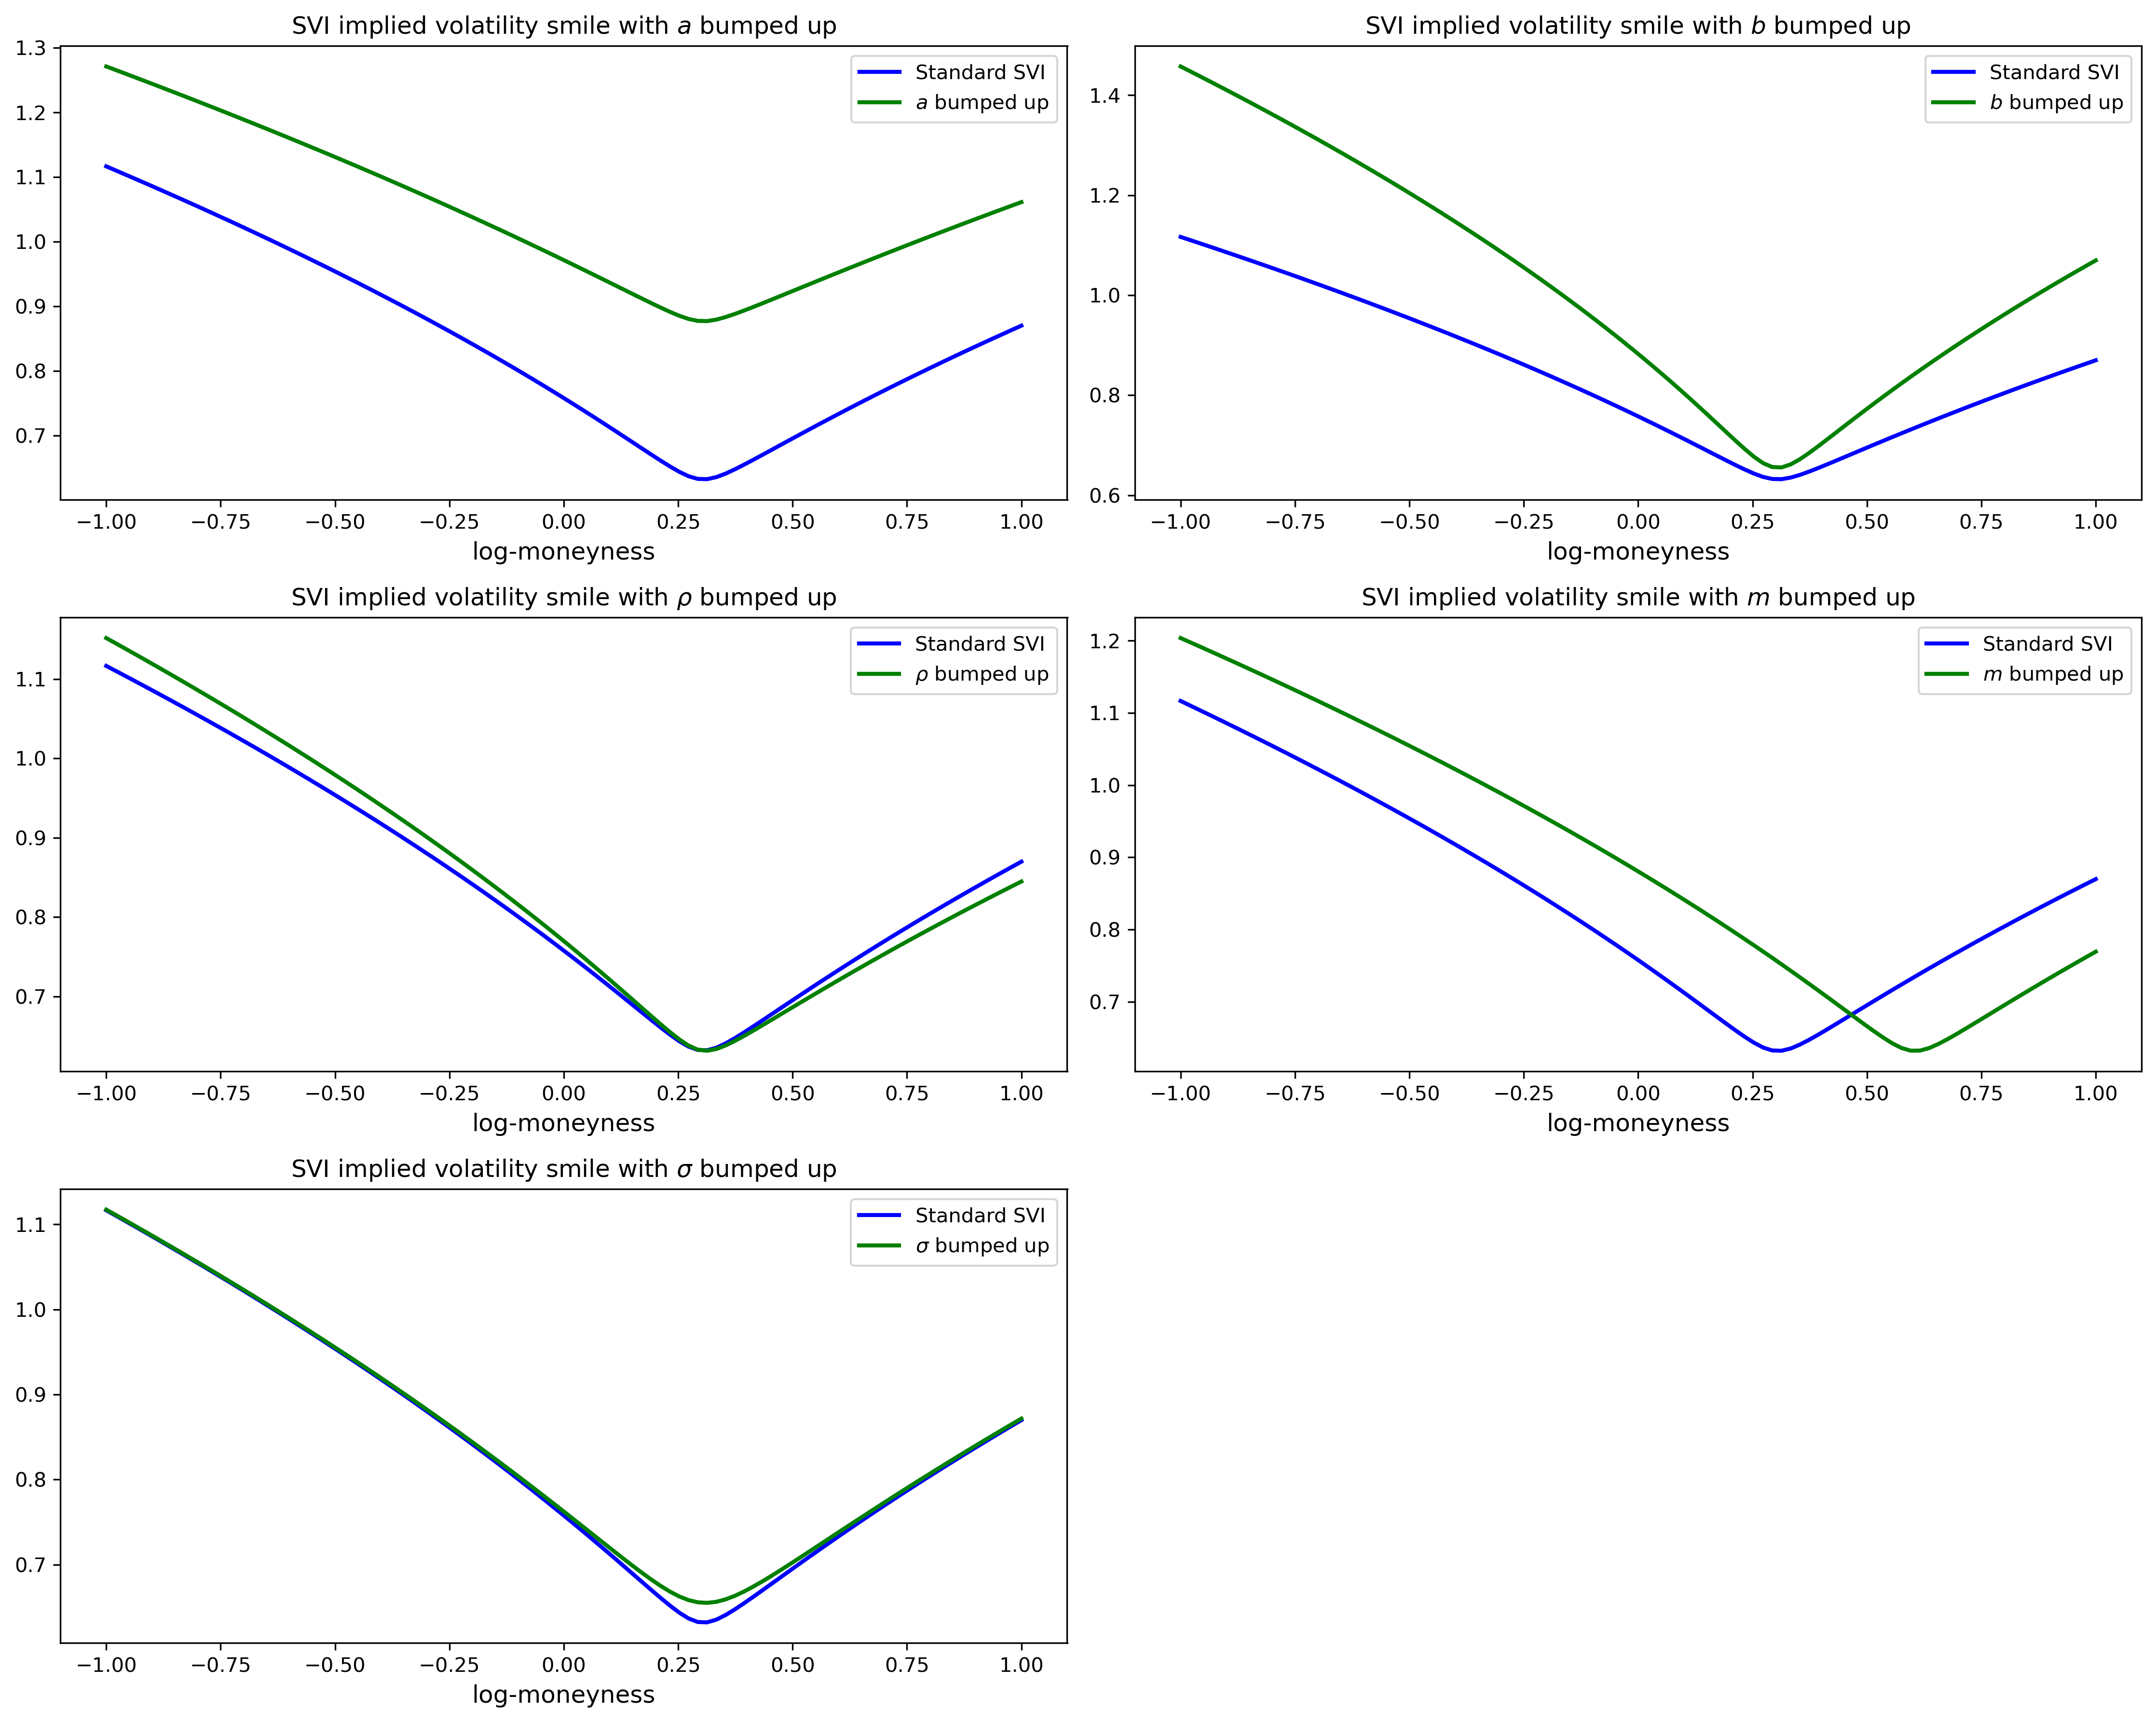

Area under density for original parameter is: 0.9988985223420257
Area under density for a bumped up is: 0.9957211294075066
Area under density for b bumped up is: 0.9902614213155182
Area under density for rho bumped up is: 0.9985051189080563
Area under density for m bumped up is: 0.9975695652532327
Area under density for sigma bumped up is: 0.998888757996954


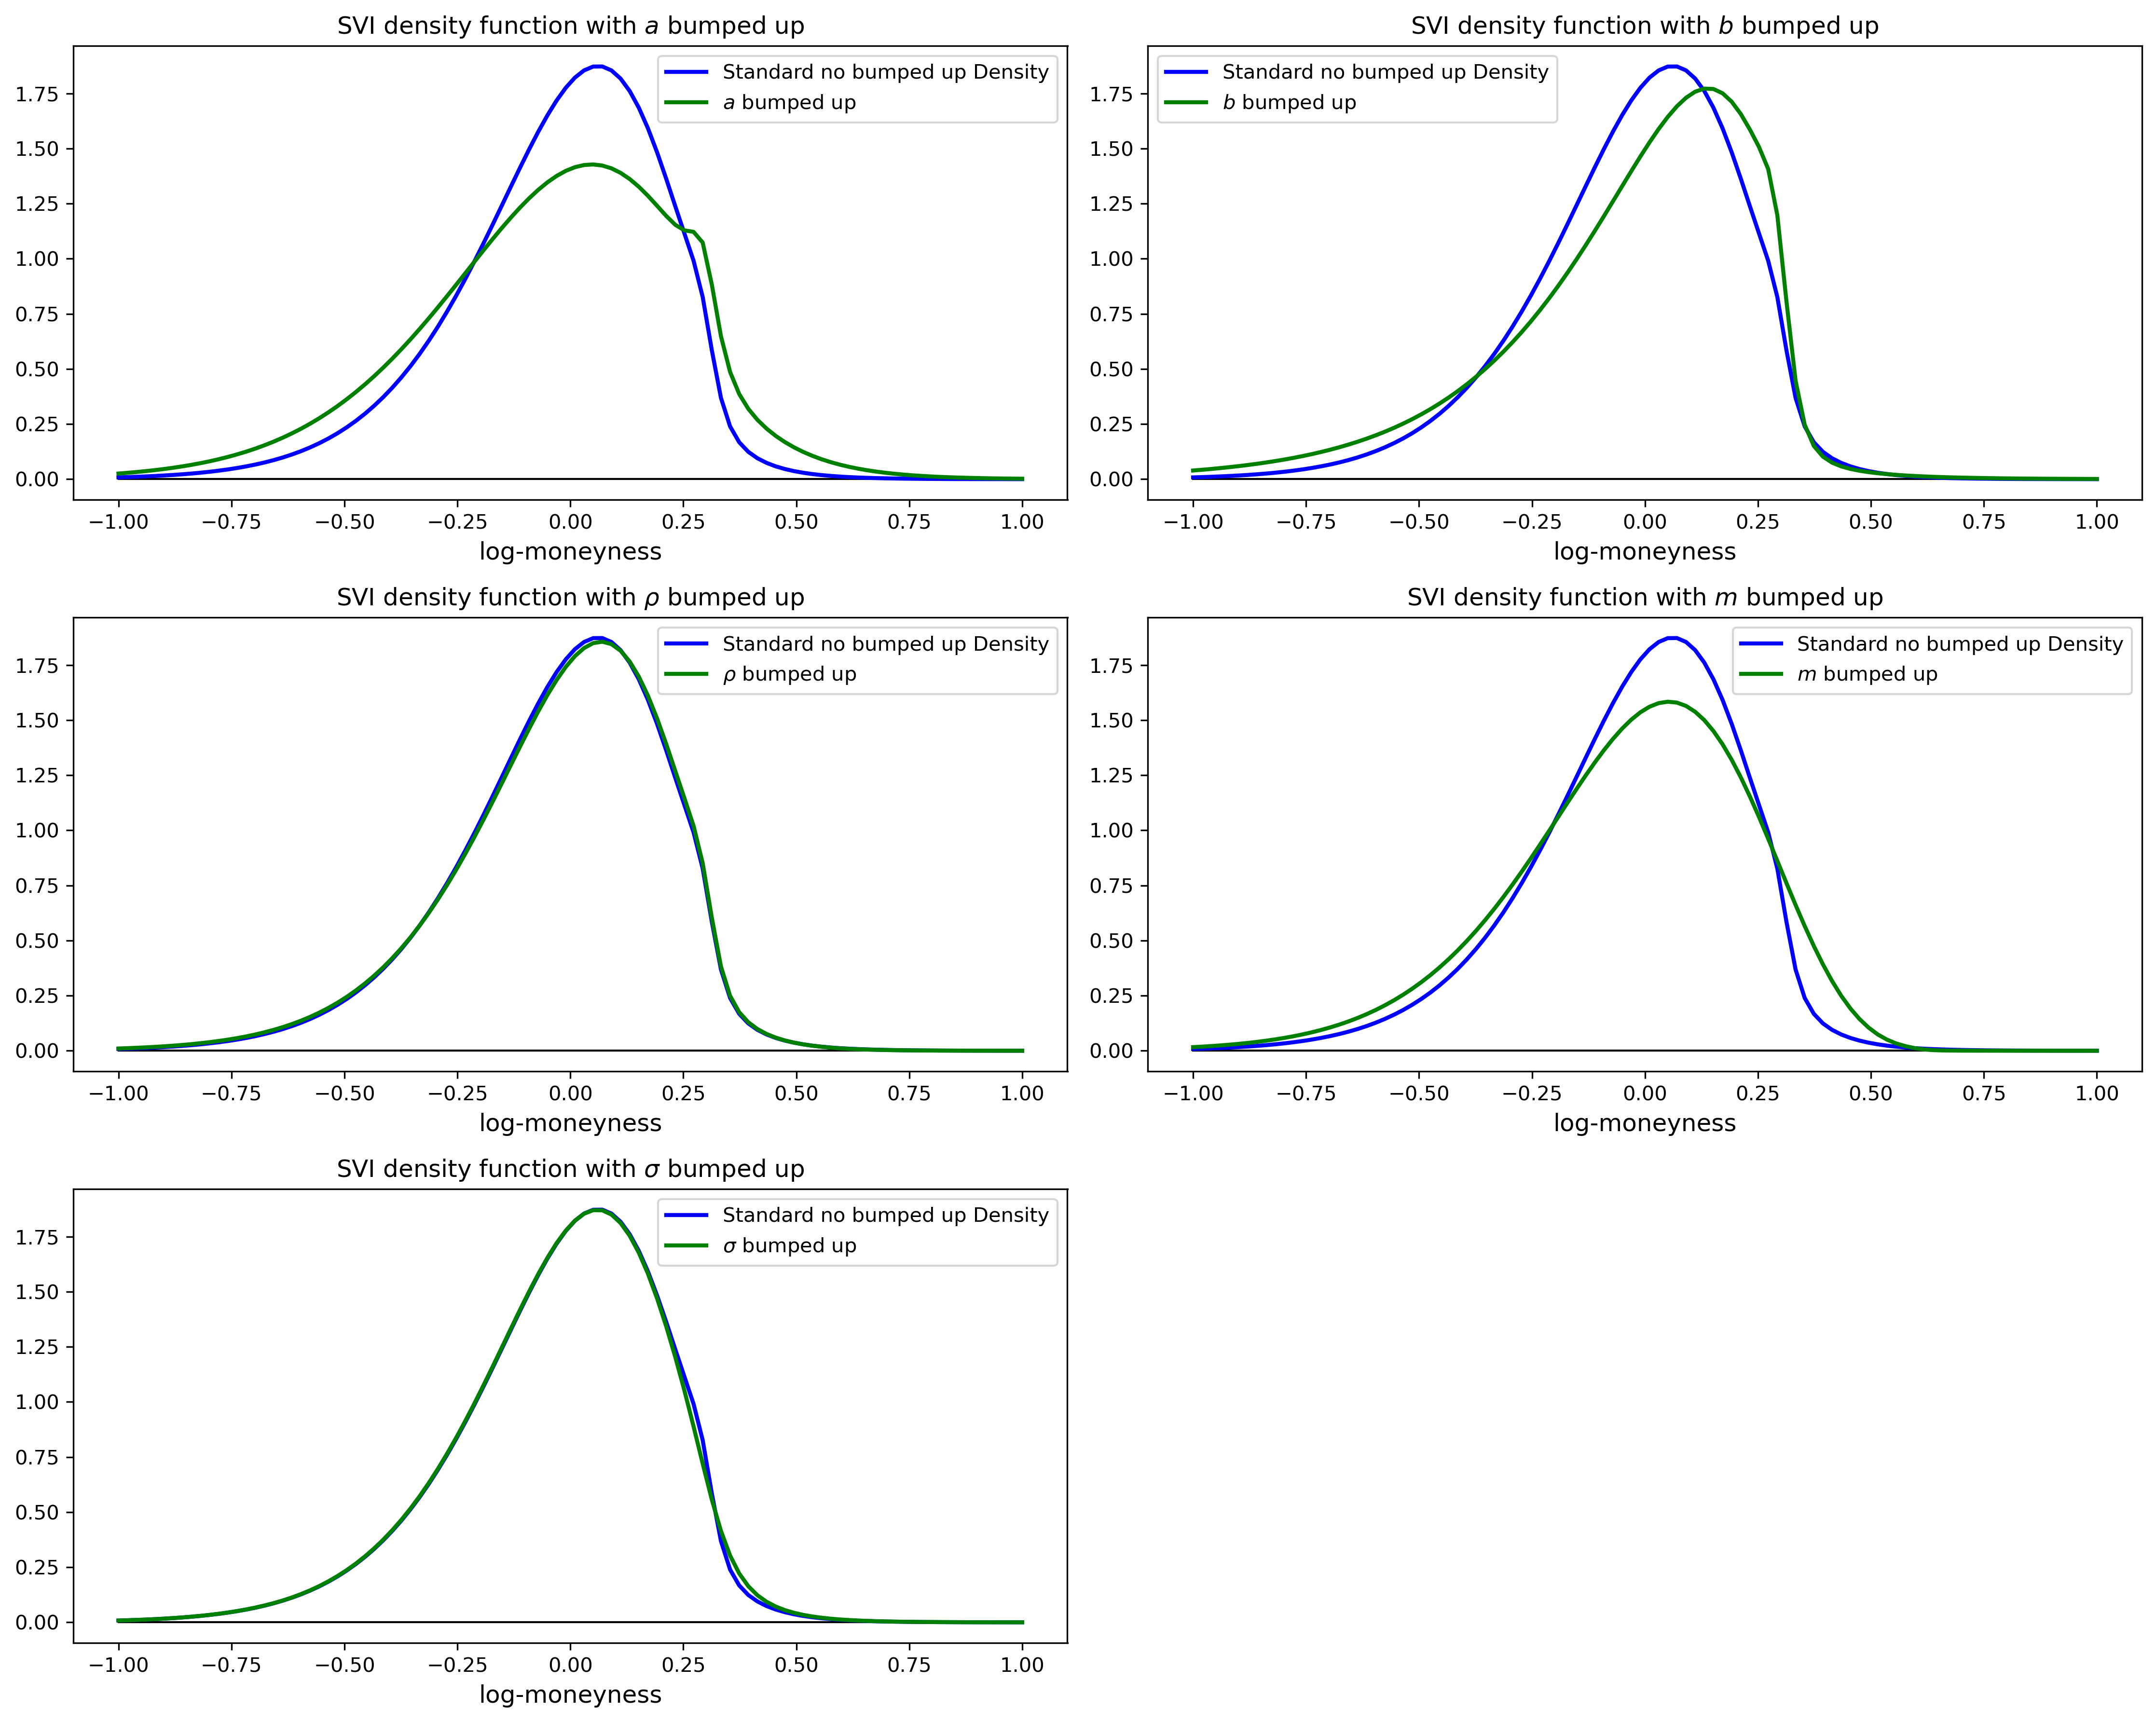

In [2]:
# # sample data
# df = pd.read_csv("./iv.csv").filter(["period", "moneyness", "iv"])  # Select cols
# df = df[df["period"] == 30]  # Subset rows where period = 30
# df["tau"] = df["period"] / 365  # Creates a new column named tau
# df.rename(columns={"moneyness": "k"}, inplace=True)  # rename column to k
# df["w"] = df["iv"]**2 * df["tau"] # total variance

# k = df["k"]
# w = df["w"]
# iv = df["iv"]
# tau = df["tau"]

######################################
##########set parameter###############
######################################

a, b, rho, m, sigma = 0.030358, 0.0503815, -0.1, 0.3, 0.048922
sviParams = [a, b, rho, m, sigma]
sviParams_list = [
    [2 * a, b, rho, m, sigma],
    [a, 2 * b, rho, m, sigma],
    [a, b, 2 * rho, m, sigma],
    [a, b, rho, 2 * m, sigma],
    [a, b, rho, m, 2 * sigma]
]

param_names = ["$a$", "$b$", r"$\rho$", "$m$", r"$\sigma$"]

# Generate implied variances
xx = np.linspace(-1., 1., 100) # k
T = [30/365] * 100 # tau

impliedVar = np.sqrt(raw_svi(sviParams, xx)/ T)
impliedVar_list = [np.sqrt(raw_svi(params, xx)/ T) for params in sviParams_list]


######################################################################################
##########Ploting SVI parametrizations with different parmeter bumps up###############
######################################################################################

fig, axes = plt.subplots(3, 2, figsize=(15, 12), dpi=300)

# 扁平化 axes 以便于迭代
axes = axes.flatten()

# 绘制子图
for i in range(5):
    axes[i].plot(xx, impliedVar, 'b', linewidth=2, label="Standard SVI")
    axes[i].plot(xx, impliedVar_list[i], 'g', linewidth=2, label=f"{param_names[i]} bumped up")
    axes[i].set_title(f"SVI implied volatility smile with {param_names[i]} bumped up")
    axes[i].set_xlabel("log-moneyness", fontsize=12)
    axes[i].legend()

# 隐藏第六个子图（如果需要）
axes[-1].axis('off')

# 调整子图之间的间距
plt.tight_layout()
plt.show()



###############################################################################################
###### plot density functions - Check the each time slide is free of butterfly arbitrage ######
###############################################################################################

# 打印密度曲线下面积
area_under_density = quad(lambda x: density(sviParams, x), xx[0], xx[-1])[0]
print(f"Area under density for original parameter is:", area_under_density)

parameter = ['a', 'b', 'rho', 'm', 'sigma']
for i in range(5):
    area_under_density_para_bump = quad(lambda x: density(sviParams_list[i], x), xx[0], xx[-1])[0]
    print(f"Area under density for {parameter[i]} bumped up is:", area_under_density_para_bump)


# 创建子图
fig, axes = plt.subplots(3, 2, figsize=(15, 12), dpi=300)

# 扁平化 axes 以便于迭代
axes = axes.flatten()

for i in range(5):
    dens1 = density(sviParams, xx)
    dens2 = density(sviParams_list[i], xx)
    zero = np.linspace(0.0, 0.0, 100)
    
    # 绘制风险中性密度
    axes[i].plot(xx, zero, 'k', linewidth=1)
    axes[i].plot(xx, dens1, 'b', linewidth=2, label="Standard no bumped up Density")
    axes[i].plot(xx, dens2, 'g', linewidth=2, label=f"{param_names[i]} bumped up")
    axes[i].set_title(f"SVI density function with {param_names[i]} bumped up")
    axes[i].set_xlabel("log-moneyness", fontsize=12)
    
    # Add legend to each subplot
    axes[i].legend()

# 隐藏第六个子图（如果需要）
axes[-1].axis('off')

# 调整子图之间的间距
plt.tight_layout()
plt.show()

##  don't need to check free of calendar spread arbitrage here because we have fixed T, so checking free of butterfly arbitrage is enough